<a href="https://colab.research.google.com/github/JaimeAndresSalas/Fundamentos-Practicos-de-Machine-Learning/blob/master/ArbolesDecision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [0]:
test_df = pd.read_csv('titanic-test.csv')

In [0]:
train_df = pd.read_csv('titanic-train.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


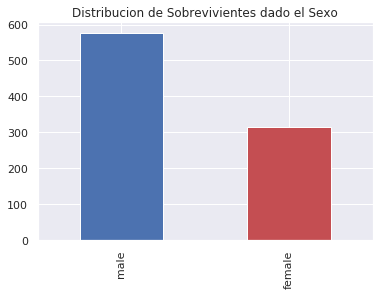

In [6]:
train_df.Sex.value_counts().plot(kind = 'bar', color = ['b','r'])
plt.title('Distribucion de Sobrevivientes dado el Sexo')
plt.show()

In [0]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [9]:
encoder_sex = label_encoder.fit_transform(train_df['Sex'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [0]:
train_predictors = train_df.drop(['PassengerId', 'Survived','Name','Ticket','Cabin'], axis=1)
categorical_cols = [cname for cname in train_predictors if 
                      train_predictors[cname].nunique() < 10 and 
                      train_predictors[cname].dtype == 'object'
                    ]

In [0]:
numeric_cols = [cname for cname in train_predictors.columns if 
                  train_predictors[cname].dtype in ['int64','float64']
                  ]

In [0]:
my_cols = categorical_cols + numeric_cols
train_predictors = train_predictors[my_cols]

In [0]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [18]:
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
y_target = train_df['Survived'].values
x_features_one = dummy_encoded_train_predictors.values

In [0]:
x_train, x_validation, y_train, y_validation = train_test_split(x_features_one,y_target, test_size = 0.25, random_state=1)

In [0]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_one, y_target)

In [26]:
tree_one_accuracy = round(tree_one.score(x_validation, y_validation), 4)
print('Accuracy :' '%0.4f' %(tree_one_accuracy))

Accuracy :0.9641


In [27]:
from io import StringIO
from IPython.display import Image, display
import pydotplus
out = StringIO()
tree.export_graphviz(tree_one, out_file= out)
graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

True